In [1]:
import lmfit
from fastai.basics import *
from lmfit.lineshapes import *
import rampy as rp  # Charles' libraries and functions
import matplotlib.pylab as plt    #Noppadon test
import numpy as np
#from collections import defaultdict 

In [2]:
import os, glob
files = glob.glob(f'Data/*.txt')
for file in files:
    print('File number: ',files.index(file),' ;', file)
num_files = files.index(file)+1

File number:  0  ; Data\K1F_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  1  ; Data\K1_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  2  ; Data\K2F_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  3  ; Data\K2_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  4  ; Data\KD7_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  5  ; Data\K_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  6  ; Data\L4W_Al foil_100P_10S_1200C_50X_785 nm_map.txt
File number:  7  ; Data\L4W_Al foil_50P_10S_1200C_50X_785 nm_Map.txt
File number:  8  ; Data\L4_Al foil_50P_10S_1200C_50X_785 nm_Map.txt
File number:  9  ; Data\L5W_Al foil_50P_10S_1200C_50X_785 nm_map.txt
File number:  10  ; Data\L5_Al foil_50P_10S_1200C_50X_785 nm_Map.txt
File number:  11  ; Data\M1F_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  12  ; Data\M1_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt
File number:  13  ; Data\M1_L-Mark_1P_10S_1200C_50X_785 nm_map.txt
File nu

In [3]:
x = {}                                             # wavenumber of spetrum i
y = {}                                             # wavenumber of spetrum i
Pos_x = {}                                         # position x of spetrum i
Pos_y = {}                                         # position y of spetrum i
num_spec = {}                                      # number of spetra in each file

for file in files:
    spectra = np.genfromtxt(f'{file}', skip_header=1)  # read file
    num_lines = sum(1 for line in spectra)             # number of lines in file
    j = 0                                              # line number in spectrum

    for line in range(num_lines-1):
        if spectra[line, 2] > spectra[line+1, 2]:      #count number of lines/spectrum
            j = j+1
        else:                    
            j = 0
        
    num_points = j+1
    num_spec[file] = int(num_lines/(j+1))
    print(file,'has',num_spec[file], 'spectra')
    print('each spectra has',num_points,'points' )
    print('total number of point =', num_lines)
    print('_________________________________________________')

    for i in range(num_spec[file]):                       # arrays of x,y of spectra and positions
        #x[file,i] = spectra[(num_points*i):((num_points*i)+num_points), 2]
        #y[file,i] = spectra[(num_points*i):((num_points*i)+num_points), 3]
        x[file,i] = spectra[(num_points*i+450):((num_points*i)+num_points-300), 2]
        y[file,i] = spectra[(num_points*i+450):((num_points*i)+num_points-300), 3]
        Pos_x[file,i] = spectra[num_points*i, 0]                               
        Pos_y[file,i] = spectra[num_points*i, 1]


Data\K1F_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of point = 80960
_________________________________________________
Data\K1_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of point = 80960
_________________________________________________
Data\K2F_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of point = 80960
_________________________________________________
Data\K2_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of point = 80960
_________________________________________________
Data\KD7_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of point = 80960
_________________________________________________
Data\K_Al foil_0.0001P_10S_1200C_50X_785 nm_map.txt has 80 spectra
each spectra has 1012 points
total number of 

In [4]:
# Cosmic ray removal

# from https://towardsdatascience.com/removing-spikes-from-raman-spectra-8a9fdda0ac22

y_cr = {}                            # cosmic removed y
Total_spikes = 0

def modified_z_score(intensity):
    median_int = np.median(intensity)
    mad_int = np.median([np.abs(intensity - median_int)])
    modified_z_scores = 0.6745 * (intensity - median_int) / mad_int
    return modified_z_scores

threshold = 130
m = 5                              # moving average value

# We calculated ∇x(i):
for file in files:
    for i in range(num_spec[file]):
        delta_int = np.diff(y[file, i])
        spikes = abs(np.array(modified_z_score(delta_int))) > threshold     # 1 is assigned to spikes, 0 to non-spikes:
        Total_spikes = Total_spikes + np.sum(spikes)
        y_cr[file, i] = y[file, i].copy()
        
        for j in np.arange(len(spikes)):
            if spikes[j] != 0:            # If we have an spike in position j
                w = np.arange(j-m,j+1+m) # we select 2 m + 1 points around our spike
                w2 = w[spikes[w] == 0] # From such interval, we choose the ones which are not spikes
                y_cr[file, i][j] = np.mean(y_cr[file, i][w2]) # and we average their values        Total_spikes = Total_spikes + np.sum(spikes)
        
print(Total_spikes)



0


Text(0.5, 1.0, 'Fig. 1: the raw data')

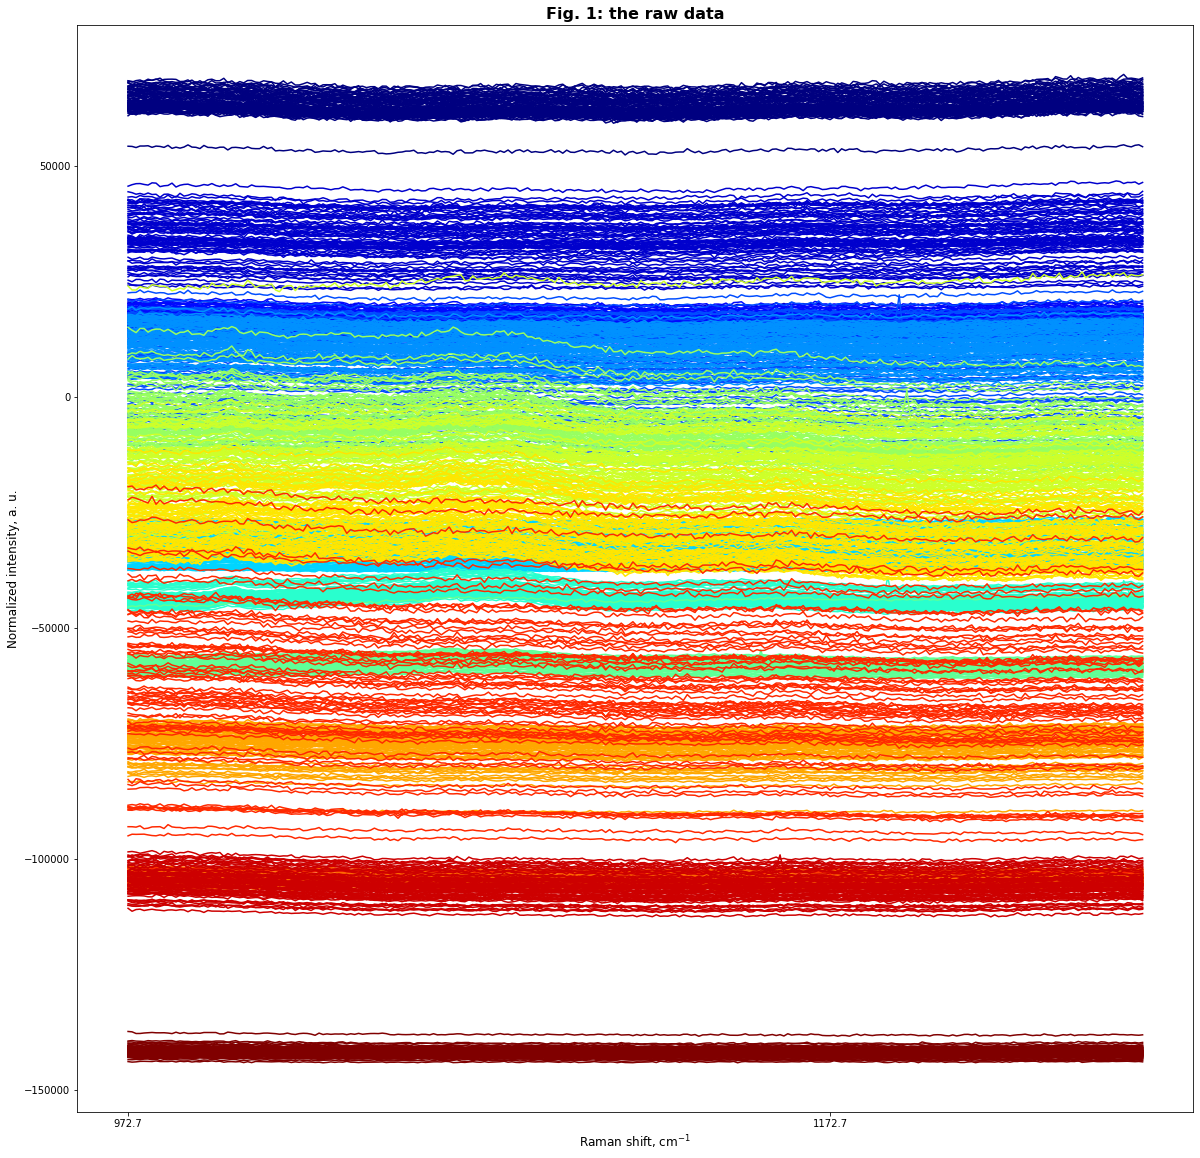

In [5]:
# create a new plot for showing the spectrum

f1 = plt.figure(1, figsize=(20, 20))
n = num_files
colors = plt.cm.jet(np.linspace(0,1,n)) 
for file in files:
    c = files.index(file)   
    for i in range(num_spec[file]):
        plt.plot(x[file,i],y[file,i]-10000*c,color=colors[c], markersize=1)
    
        
plt.xticks(np.arange(min(x[file,i]), max(x[file,i]), 200))
plt.xlabel("Raman shift, cm$^{-1}$", fontsize=12)
plt.ylabel("Normalized intensity, a. u.", fontsize=12)
plt.title("Fig. 1: the raw data", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Fig. 1: Cosmic ray removed data')

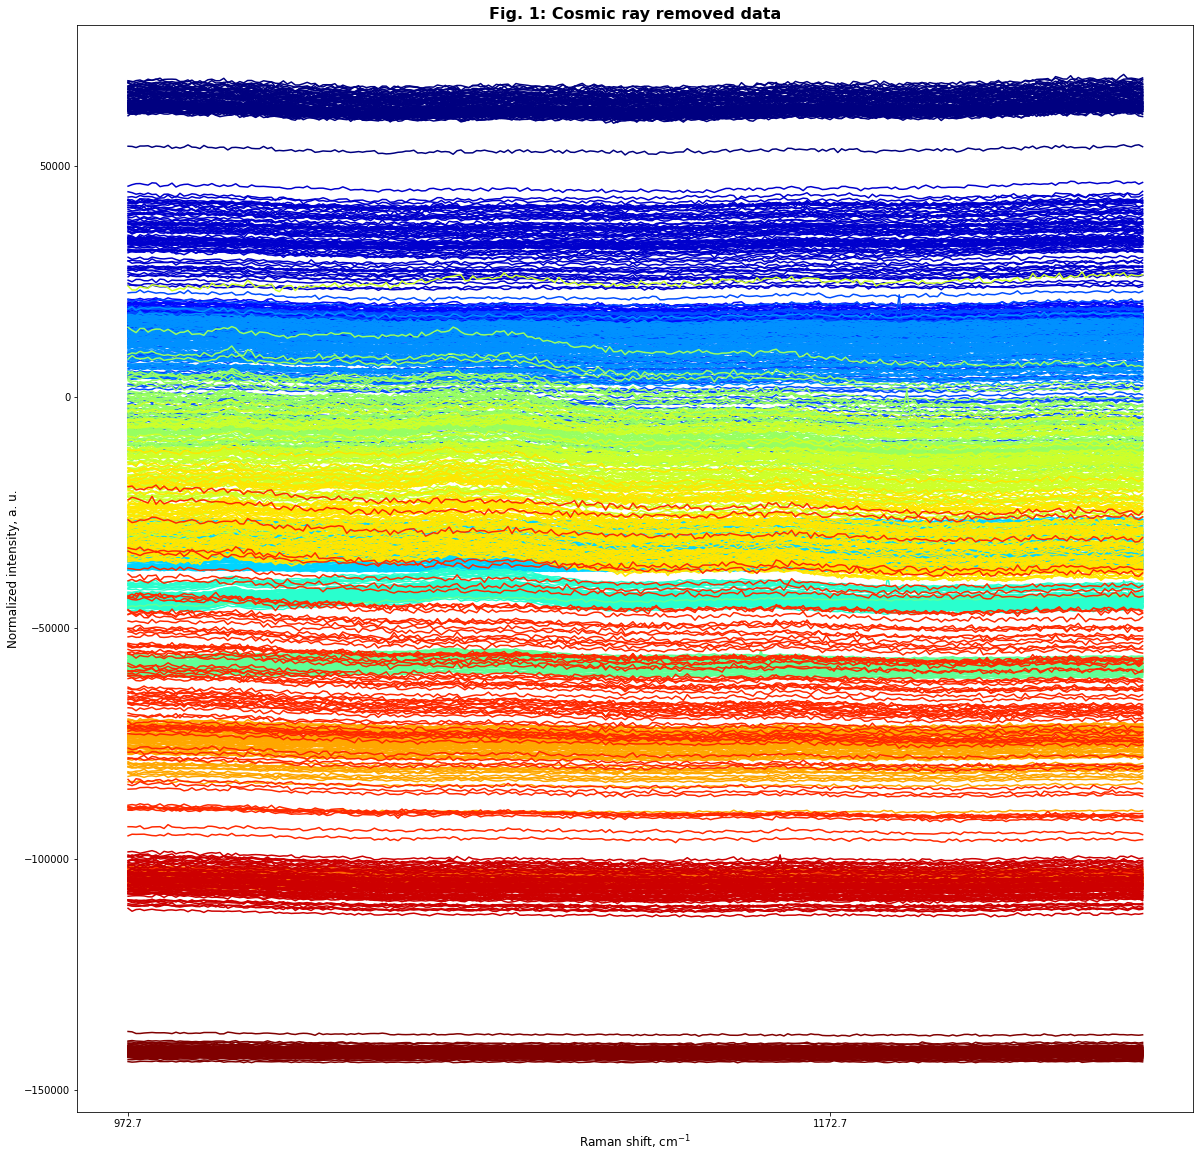

In [6]:
# Cosmic ray removed

f1 = plt.figure(1, figsize=(20, 20))
n = 10 
for file in files:
    c = files.index(file)   
    for i in range(num_spec[file]):
        y_stack = y_cr[file,i]-10000*c
        plt.plot(x[file,i],y_stack,color=colors[c], markersize=1)
    
        
plt.xticks(np.arange(min(x[file,i]), max(x[file,i]), 200))
plt.xlabel("Raman shift, cm$^{-1}$", fontsize=12)
plt.ylabel("Normalized intensity, a. u.", fontsize=12)
plt.title("Fig. 1: Cosmic ray removed data", fontsize=16, fontweight="bold")

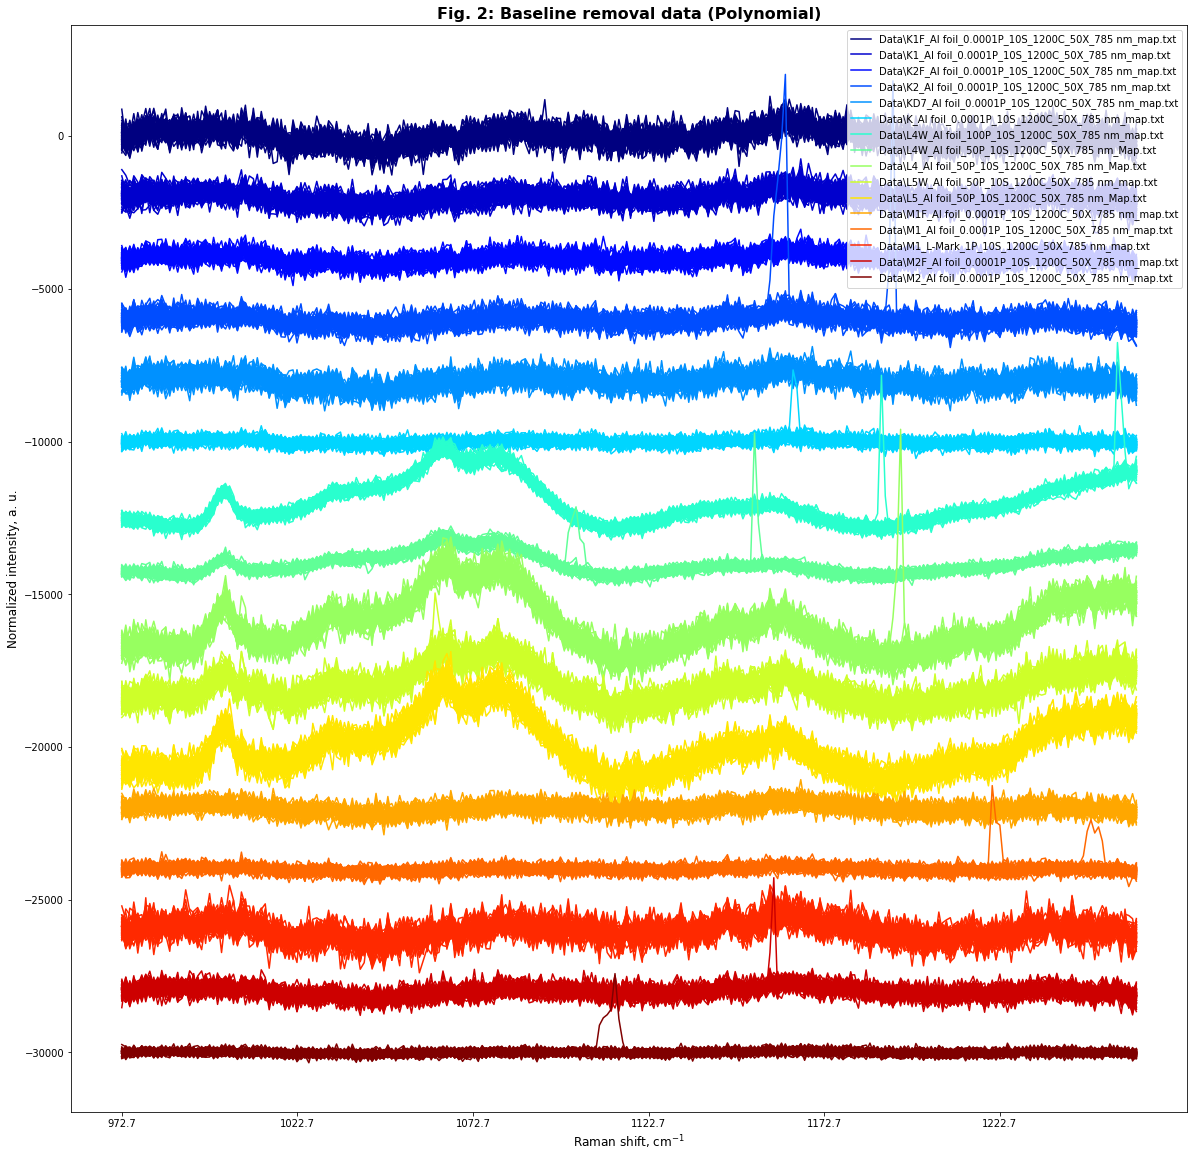

In [20]:
# "Fig. 2: Baseline removal data (Polynomial)"

f2 = plt.figure(1, figsize=(20, 20))
y_corr = {}
y_base = {}
y_total = []
y_class = []
bir = np.array([(135,1400)])  # The regions where the baseline will be fitted
for file in files:  
    c = files.index(file)   
    for i in range(num_spec[file]):
        y_corr[file,i], y_base[file,i] = rp.baseline(x[file,i], y_cr[file,i], bir, 'poly', polynomial_order=2)  # We fit a polynomial background.
        y_total.append(y_corr[file,i][:,0])
        y_class.append(c)
        y_stack = y_corr[file,i]-2000*c
        plt.plot(x[file,i],y_stack,color=colors[c], markersize=1)
    plt.plot(x[file,i],y_stack,color=colors[c], label = file, markersize=1)
           
plt.xticks(np.arange(min(x[file,i]), max(x[file,i]), 50))
plt.xlabel("Raman shift, cm$^{-1}$", fontsize=12)
plt.ylabel("Normalized intensity, a. u.", fontsize=12)
plt.title("Fig. 2: Baseline removal data (Polynomial)", fontsize=16, fontweight="bold")
plt.legend(loc='upper right')

In [8]:
y_total = np.array(y_total)
y_class = np.array(y_class)

In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
data_pca = pca.fit_transform(y_total)

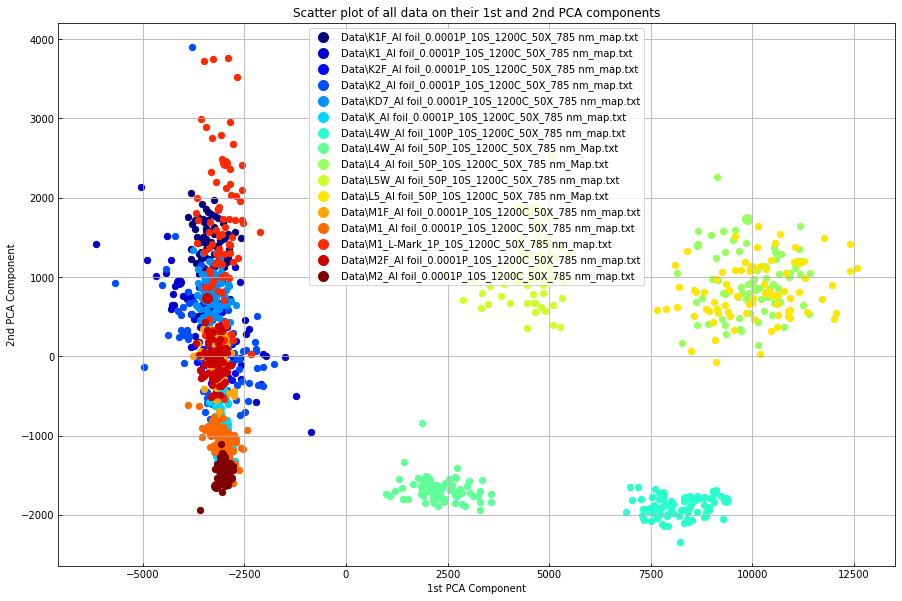

In [10]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, ax = plt.subplots()
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
j = 0
for file in files:  
    c = files.index(file)
    ax.scatter(data_pca[j, 0], data_pca[j, 1], s=100, label= file, color=colors[c])
    ax.scatter(data_pca[j+1:j+num_spec[file], 0], data_pca[j+1:j+num_spec[file], 1], s=40, color=colors[c])
    j = j+num_spec[file]
   
ax.grid(True)
ax.set_xlabel('1st PCA Component')
ax.set_ylabel('2nd PCA Component')
ax.set_title('Scatter plot of all data on their 1st and 2nd PCA components')
ax.legend()

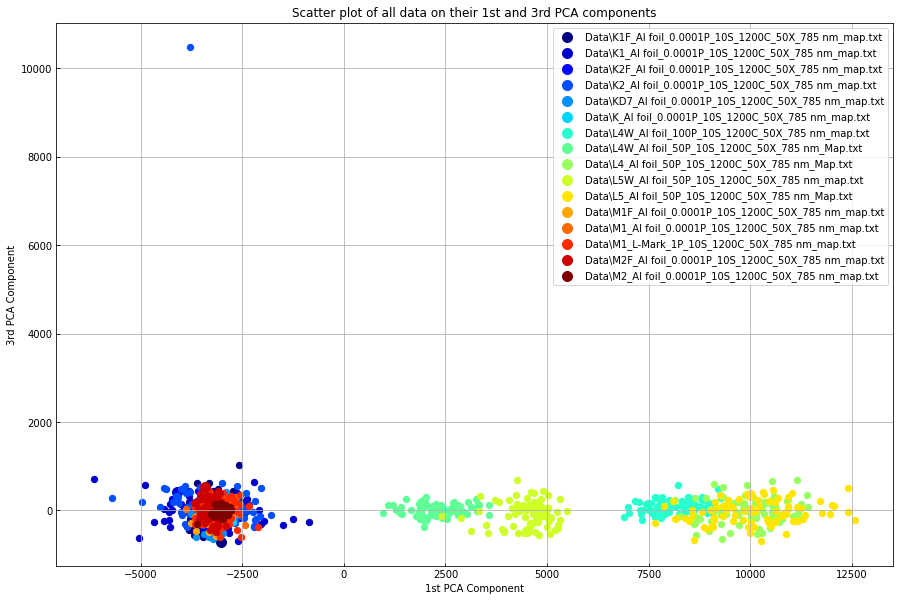

In [11]:
fig, ax = plt.subplots()
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
j = 0
for file in files:  
    c = files.index(file)
    ax.scatter(data_pca[j, 0], data_pca[j, 2], s=100, label= file, color=colors[c])
    ax.scatter(data_pca[j+1:j+num_spec[file], 0], data_pca[j+1:j+num_spec[file], 2], s=40, color=colors[c])
    j = j+num_spec[file]
   
ax.grid(True)
ax.set_xlabel('1st PCA Component')
ax.set_ylabel('3rd PCA Component')
ax.set_title('Scatter plot of all data on their 1st and 3rd PCA components')
ax.legend()

In [12]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
data_lda = lda.fit_transform(y_total, y_class)

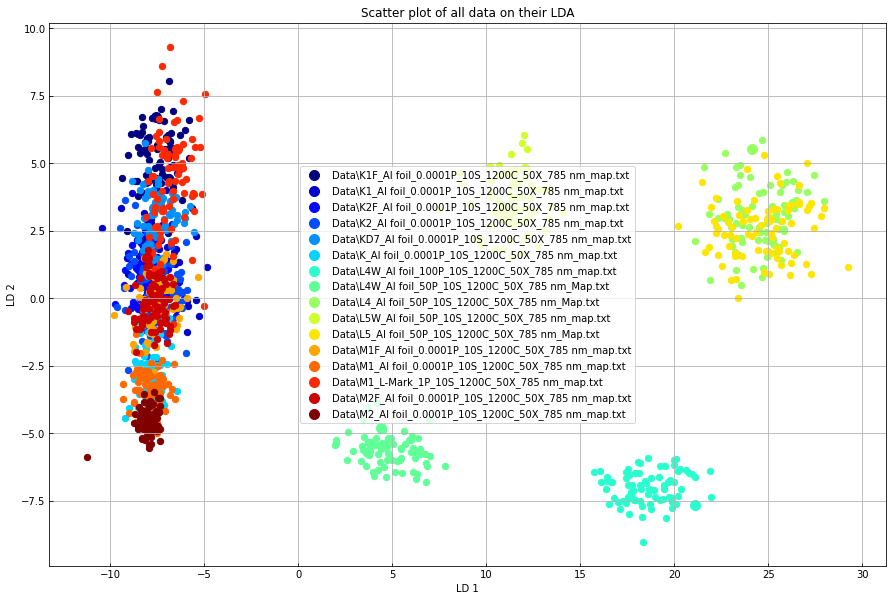

In [13]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
fig, ax = plt.subplots()
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
j = 0
for file in files:  
    c = files.index(file)
    ax.scatter(data_lda[j, 0], data_lda[j, 1], s=100, label= file, color=colors[c])
    ax.scatter(data_lda[j+1:j+num_spec[file], 0], data_lda[j+1:j+num_spec[file], 1], s=40, color=colors[c])
    j = j+num_spec[file]
   
ax.grid(True)
ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')
ax.set_title('Scatter plot of all data on their LDA')
ax.legend()

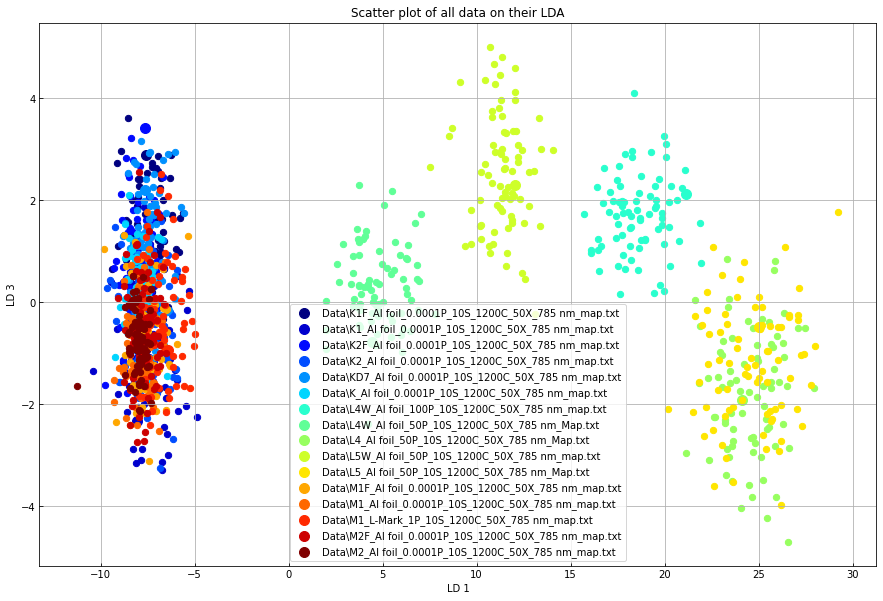

In [14]:
fig, ax = plt.subplots()
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
j = 0
for file in files:  
    c = files.index(file)
    ax.scatter(data_lda[j, 0], data_lda[j, 2], s=100, label= file, color=colors[c])
    ax.scatter(data_lda[j+1:j+num_spec[file], 0], data_lda[j+1:j+num_spec[file], 2], s=40, color=colors[c])
    j = j+num_spec[file]
   
ax.grid(True)
ax.set_xlabel('LD 1')
ax.set_ylabel('LD 3')
ax.set_title('Scatter plot of all data on their LDA')
ax.legend()

<ipython-input-15-d37d04914152>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3 = Axes3D(fig3D)


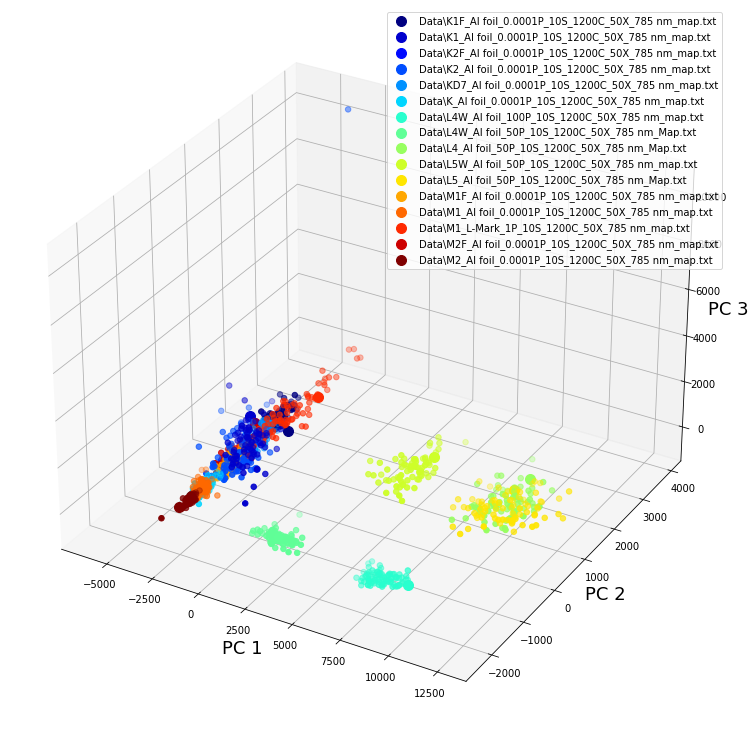

In [15]:
#PCA 3D plot

from mpl_toolkits.mplot3d import Axes3D
fig3D = plt.figure(figsize=(15,10)) 
ax3 = Axes3D(fig3D)

j = 0
for file in files:  
    c = files.index(file)
    ax3.scatter(data_pca[j, 0], data_pca[j, 1],  data_pca[j, 2], s=100, label= file, color=colors[c])
    ax3.scatter(data_pca[j+1:j+num_spec[file], 0], data_pca[j+1:j+num_spec[file], 1], data_pca[j+1:j+num_spec[file], 2], s=30, color=colors[c])
    j = j+num_spec[file]

ax3.set_xlabel('PC 1',fontsize=18)
ax3.set_ylabel('PC 2',fontsize=18)
ax3.set_zlabel('PC 3',fontsize=18)
ax3.legend()
plt.show()

<ipython-input-16-995ada8b0b7d>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3 = Axes3D(fig3D2)


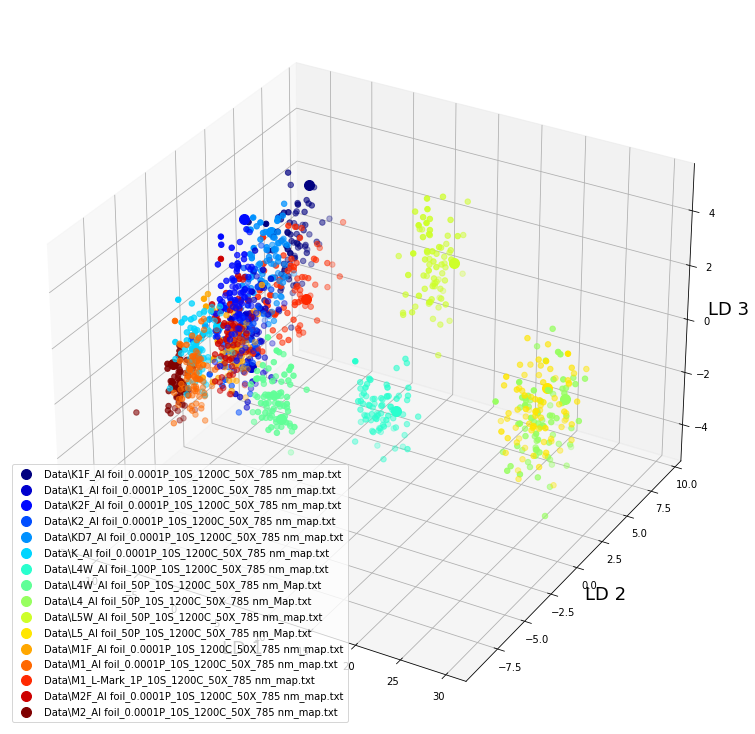

In [16]:
#LDA 3D plot

from mpl_toolkits.mplot3d import Axes3D
fig3D2 = plt.figure(figsize=(15,10)) 
ax3 = Axes3D(fig3D2)

j = 0
for file in files:  
    c = files.index(file)
    ax3.scatter(data_lda[j, 0], data_lda[j, 1],  data_lda[j, 2], s=100, label= file, color=colors[c])
    ax3.scatter(data_lda[j+1:j+num_spec[file], 0], data_lda[j+1:j+num_spec[file], 1], data_lda[j+1:j+num_spec[file], 2], s=30, color=colors[c])
    j = j+num_spec[file]

ax3.set_xlabel('LD 1',fontsize=18)
ax3.set_ylabel('LD 2',fontsize=18)
ax3.set_zlabel('LD 3',fontsize=18)
ax3.legend()
plt.show()

Text(0, 0.5, 'Loadings')

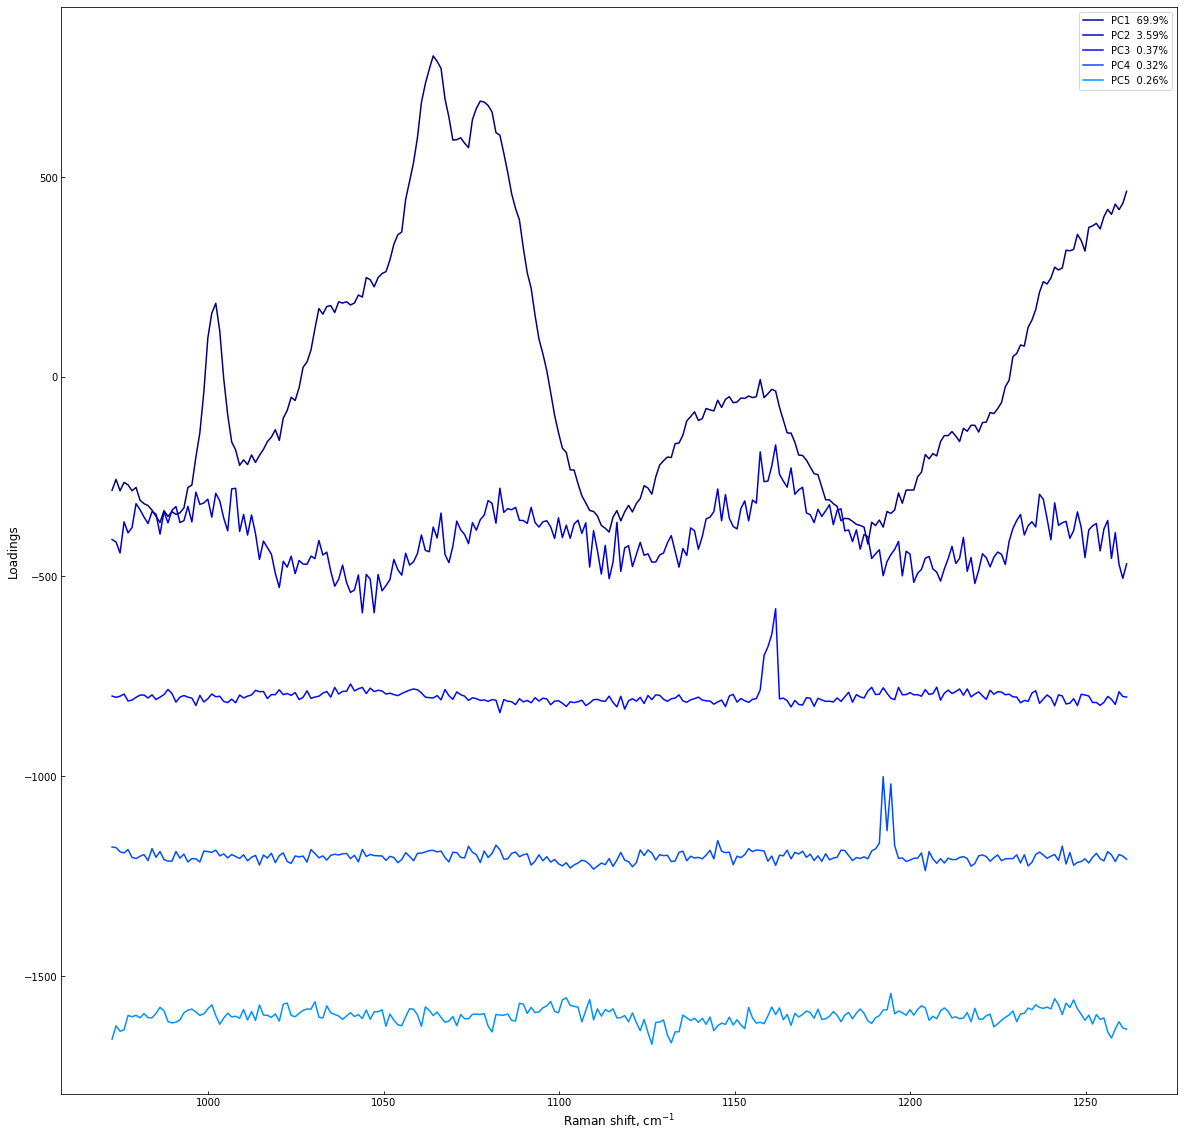

In [17]:
# PCA loading plot

f5 = plt.figure(1, figsize=(20, 20))
n = 10 
loadings = pca.components_.T* np.sqrt(pca.explained_variance_)
labels = []
for i in range(0,5):
    y_stack_loadings = loadings.T[i]-400*i
    plt.plot(x[files[1],0],y_stack_loadings,color=colors[i], markersize=1)
    labels.append('PC'+ str(i+1)+'  '+str(round(100*pca.explained_variance_ratio_[i],2))+'%')
plt.legend(labels)
plt.tick_params(axis='both', direction = 'in' )
plt.xlabel("Raman shift, cm$^{-1}$", fontsize=12)
plt.ylabel("Loadings", fontsize=12)

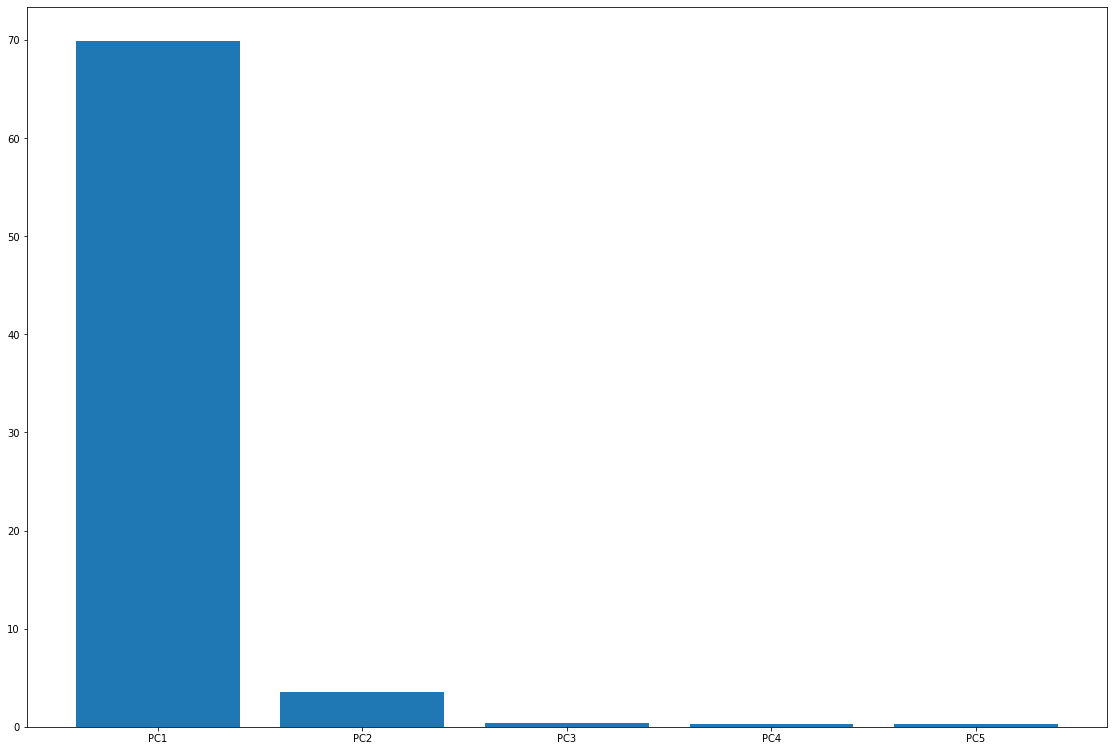

In [18]:
fig_scree = plt.figure()
ax = fig_scree.add_axes([0,0,1,1])
PC = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
EiV = pca.explained_variance_ratio_
ax.bar(PC,EiV*100)
plt.show()